<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Covid-19_in_Europa/blob/master/corona_knights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# reference https://blog.furas.pl/python-scraping-how-to-get-data-from-interactive-plot-created-with-highcharts-gb.html
import requests
from requests import get

from bs4 import BeautifulSoup

import pandas as pd

import numpy as np
url0 = 'https://www.worldometers.info/coronavirus/country/'

In [2]:
country = ['italy/' ,'spain/' , 'germany/' ,'france/']
print(type(country[0]))
for i in country:
  url = url0 + i
  r = requests.get(url)
  data = r.text
  soup = BeautifulSoup(data,'html.parser')
  print(soup.title.text)
  print()
  all_scripts = soup.find_all('script')

  script = all_scripts[22].text
  print(script)
  print('\n--- eval ---\n')

  data = script.split('data: [',1)[1].split(']', 1)[0]
  day = script.split('categories: [',1)[1].split(']', 1)[0]
  data = eval(data) 
  day = eval(day)  # it creates tuple
  day= list(day)
  data = list(data)
  print(data,'\n',day)
  if i == 'italy/':
    italy_nr = data
    italy_day = day
  elif i == 'spain/':
    spain_nr = data
    spain_day = day
  elif i == 'germany/':
    germany_nr = data
    germany_day = day  
  elif i == 'france/':
    france_nr = data
    france_day = day

print(len(germany_nr),len(france_nr),len(italy_nr),len(spain_nr),len(day))

<class 'str'>
Italy Coronavirus: 35,713 Cases and 2,978 Deaths - Worldometer


    Highcharts.chart('coronavirus-cases-linear', {
        chart: {
            type: 'line'
        },
        title: {
            text: 'Total Cases'
        },

        subtitle: {
            text: '(Linear Scale)'
        },

        xAxis: {
            categories: ["Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17"]        },

        yAxis: {
            title: {
                text: 'Total Coronavirus Cases'
            }


        },
        legend: {
            layout: 'vertical',
            align: 'right',
            verticalAlign: 'middle'
        },

        credits: {
            enabled: false
        },


        series: [{
            name: 'Cases',
   

In [3]:
title = 'Four corona knights in Europa'

df = pd.DataFrame(data={"day": spain_day,"col1": italy_nr, "col2": spain_nr, "col3": germany_nr, "col4": france_nr})
df.to_csv("./file.csv", sep=',',index=False)
df

,day,col1,col2,col3,col4
0,Feb 15,3,2,16,12
1,Feb 16,3,2,16,12
2,Feb 17,3,2,16,12
3,Feb 18,3,2,16,12
4,Feb 19,3,2,16,12
5,Feb 20,4,2,16,12
6,Feb 21,21,2,16,12
7,Feb 22,79,2,16,12
8,Feb 23,157,2,16,12
9,Feb 24,229,3,16,12


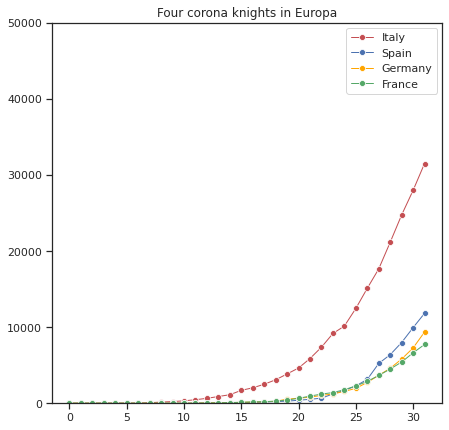

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1})
f,ax= plt.subplots(figsize=(7,7))
palette = sns.color_palette("mako_r", 6)
ax.set(ylim=(0, 50000))
x_pos = list(range(len(day)))
sns.lineplot(x_pos, 
             italy_nr,
             color='r',
             marker="o",
             sort=False,
             label="Italy",
             ax=ax).set_title(title)
sns.lineplot(x_pos, 
             spain_nr,
             color='b',
             marker="o",
             sort=False,
             label="Spain",
             ax=ax)
sns.lineplot(x_pos, 
             germany_nr,
             color='orange',
             marker="o",
             sort=False,
             label="Germany",
             ax=ax)

sns.lineplot(x_pos, 
             france_nr,
             color='g',
             marker="o",
             sort=False,
             label="France",
             ax=ax)

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction


In [6]:
days = 10
def predict_days(days,i):
  Predictions = list()
  if i == 'italy':
    Actual = italy_nr[:] 
  elif i == 'spain':
    Actual =spain_nr[:] 

  elif i == 'germany':
    Actual =germany_nr[:] 
 
  elif i == 'france':
    Actual = france_nr[:]    
  else:
    print('Error of Country name') 
  for i in range(days):
    Prediction = StartARIMAForecasting(Actual, 3,2,0)    
      #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    Predictions.append(np.asscalar(Prediction))
    Actual.append(np.asscalar(Prediction))
  return Predictions
italy_Predictions = [italy_nr[-1]]+predict_days(days,'italy')
spain_Predictions = [spain_nr[-1]]+predict_days(days,'spain')
germany_Predictions = [germany_nr[-1]]+predict_days(days,'germany')
france_Predictions = [france_nr[-1]]+predict_days(days,'france')
print('italy prediction:', italy_Predictions)

x = x_pos[-1]
TestDay =list(range(x,x+days+1))
print(TestDay)
print(len(TestDay),len(italy_Predictions),len(spain_Predictions),len(germany_Predictions),len(france_Predictions))
print('\n',len(x_pos),len(germany_nr))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


italy prediction: [31506, 35128.5564069214, 38718.04623135932, 42523.77277057868, 46418.3961332158, 50381.89091063286, 54505.88999518857, 58724.680238311725, 63045.229625685955, 67498.51590928195, 72054.23624279287]
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
11 11 11 11 11

 32 32


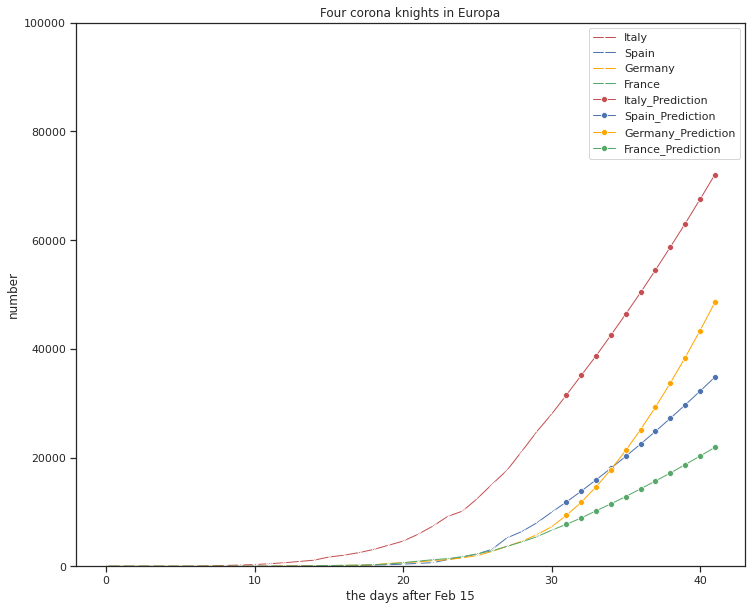

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", rc={"lines.linewidth": 1})
f,ax= plt.subplots(figsize=(12,10))
ax.set(ylim=(0, 100000))
ax.set(xlabel="the days after Feb 15", ylabel="number")
sns.lineplot(x_pos, 
             italy_nr,
             color='r',
             marker="x",
             sort=False,
             label="Italy",
             ax=ax).set_title(title)
sns.lineplot(x_pos, 
             spain_nr,
             color='b',
             marker="x",
             sort=False,
             label="Spain",
             ax=ax)
sns.lineplot(x_pos, 
             germany_nr,
             color='orange',
             marker="x",
             sort=False,
             label="Germany",
             ax=ax)

sns.lineplot(x_pos, 
             france_nr,
             color='g',
             marker="x",
             sort=False,
             label="France",
             ax=ax)
# predictions
sns.lineplot(TestDay, 
             italy_Predictions,
             color='r',
             marker="o",
             sort=False,
             label="Italy_Prediction",
             ax=ax)
sns.lineplot(TestDay, 
             spain_Predictions,
             color='b',
             marker="o",
             sort=False,
             label="Spain_Prediction",
             ax=ax)
sns.lineplot(TestDay, 
             germany_Predictions,
             color='orange',
             marker="o",
             sort=False,
             label="Germany_Prediction",
             ax=ax)

sns.lineplot(TestDay, 
             france_Predictions,
             color='g',
             marker="o",
             sort=False,
             label="France_Prediction",
             ax=ax)

